<a href="https://colab.research.google.com/github/alexmacharia/deep_learning_projects/blob/main/3_Keras_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
!cp '/content/gdrive/My Drive/data/mnist_cnn_25_Epochs.h5' mnist_cnn_25_Epochs.h5

In [3]:
from tensorflow.keras.models import load_model

model = load_model('mnist_cnn_25_Epochs.h5')

In [4]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
import numpy as np

# Reshape test data
print(x_test.shape)
x_test = x_test.reshape(10000,28,28,1)
print(x_test.shape)

# Predict all test set
pred = np.argmax(model.predict(x_test), axis=-1)


(10000, 28, 28)
(10000, 28, 28, 1)
313/313 [==============================] - 7s 21ms/step


In [6]:
import cv2
import numpy as np

# Create an array of indices for misclassified samples
result = np.absolute(y_test - pred)
misclassified_indices = np.nonzero(result > 0)

print(misclassified_indices)


(array([   8,   33,  124,  149,  193,  195,  233,  241,  247,  259,  290,
        300,  318,  320,  321,  340,  341,  352,  362,  412,  444,  445,
        448,  478,  479,  495,  502,  507,  511,  515,  531,  536,  547,
        551,  565,  578,  582,  591,  613,  619,  628,  659,  684,  689,
        691,  707,  717,  720,  726,  740,  791,  810,  839,  844,  898,
        939,  947,  950,  951,  965,  990, 1012, 1014, 1032, 1039, 1044,
       1062, 1073, 1096, 1107, 1112, 1114, 1173, 1181, 1192, 1194, 1198,
       1204, 1206, 1226, 1232, 1242, 1247, 1256, 1260, 1270, 1272, 1283,
       1289, 1299, 1319, 1326, 1328, 1337, 1378, 1393, 1413, 1440, 1444,
       1467, 1494, 1500, 1522, 1527, 1530, 1549, 1553, 1569, 1581, 1609,
       1621, 1634, 1671, 1681, 1709, 1716, 1717, 1718, 1740, 1754, 1772,
       1790, 1850, 1857, 1878, 1883, 1901, 1911, 1917, 1938, 1940, 1941,
       1952, 1970, 1981, 1984, 2016, 2024, 2033, 2035, 2040, 2043, 2044,
       2053, 2070, 2093, 2098, 2109, 2110, 2118, 2

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title="", image=None, size=6):
  if image.any():
    w,h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()
  else:
    print("Image not found")



1/1 [==============================] - 0s 35ms/step


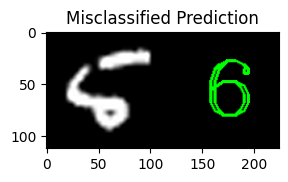

1/1 [==============================] - 0s 35ms/step


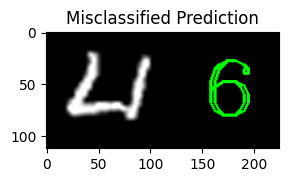

1/1 [==============================] - 0s 34ms/step


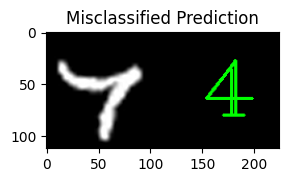

1/1 [==============================] - 0s 33ms/step


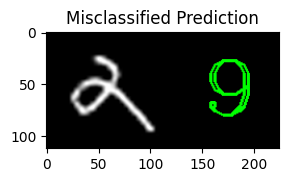

1/1 [==============================] - 0s 32ms/step


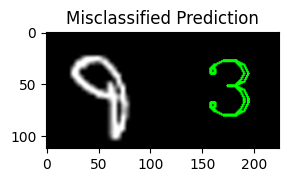

1/1 [==============================] - 0s 32ms/step


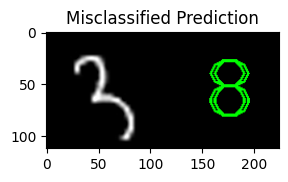

1/1 [==============================] - 0s 25ms/step


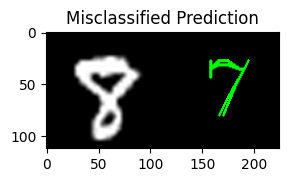

1/1 [==============================] - 0s 22ms/step


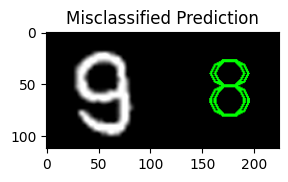

1/1 [==============================] - 0s 22ms/step


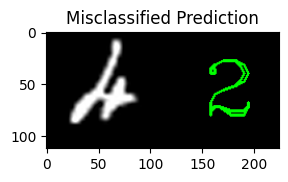

1/1 [==============================] - 0s 22ms/step


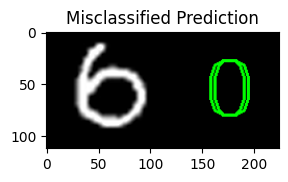

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

def draw_test(name, pred, input_im):
  BLACK =  [0,0,0]
  # Expand original image
  expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0], cv2.BORDER_CONSTANT, value=BLACK)
  # Convert grayscale to color
  expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
  # Insert text to image
  cv2.putText(expanded_image, str(pred), (150,80), cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0, 255, 0), 2)
  # Show image
  imshow(name, expanded_image)


for i in range(0, 10):
  input_im = x_test[misclassified_indices[0][i]]
  # resize image
  imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
  # reshape for input to the network
  input_im = input_im.reshape(1,28,28,1)
  # get prediction
  res = str(np.argmax(model.predict(input_im), axis=-1)[0])
  
  draw_test("Misclassified Prediction", res, np.uint8(imageL))


1/1 [==============================] - 0s 35ms/step


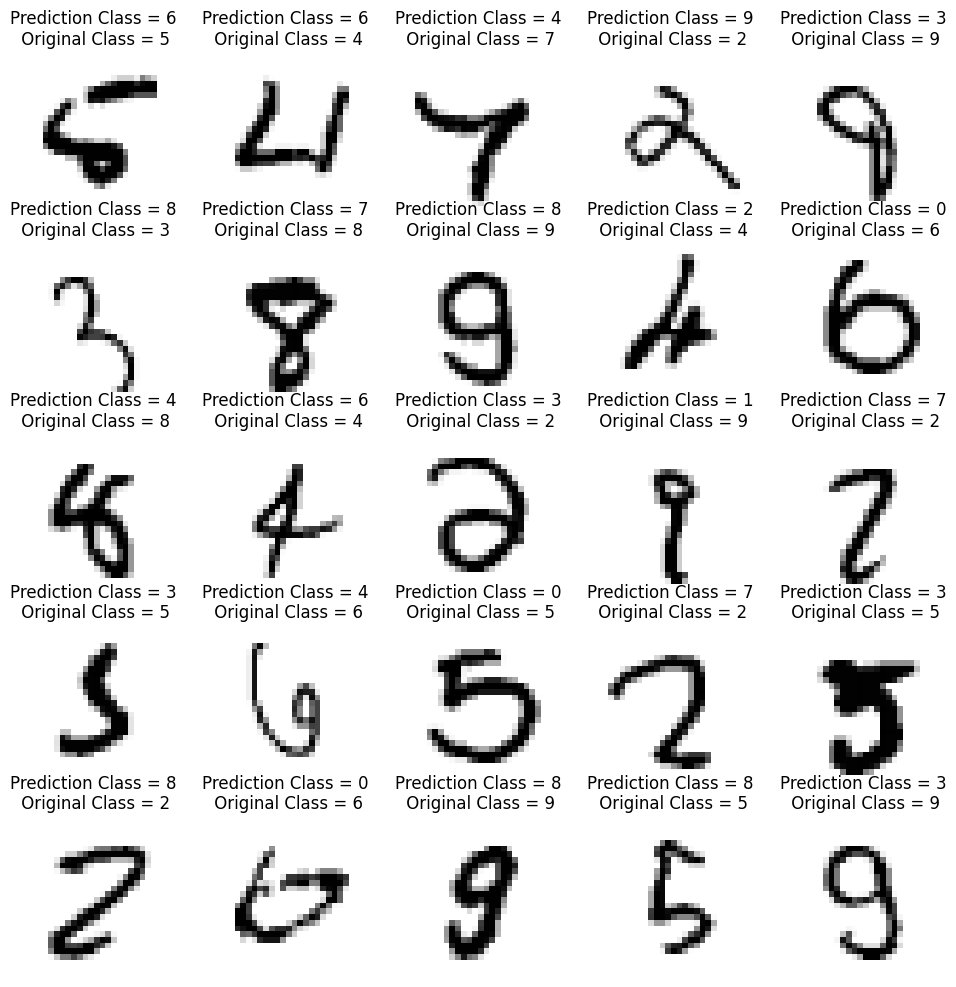

In [9]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
  input_im = x_test[misclassified_indices[0][i]]
  ind = misclassified_indices[0][i]
  predicted_class = str(np.argmax(model.predict(input_im.reshape(1,28,28,1)), axis=-1)[0])
  axes[i].imshow(input_im.reshape(28,28), cmap='gray_r')
  axes[i].set_title(f"Prediction Class = {predicted_class}\n Original Class = {y_test[ind]}")
  axes[i].axis('off')

In [10]:
from sklearn.metrics import confusion_matrix
import numpy as np

x_test = x_test.reshape(10000,28,28,1)
y_pred = np.argmax(model.predict(x_test), axis=-1)

print(confusion_matrix(y_test, y_pred))

313/313 [==============================] - 8s 27ms/step
[[ 966    0    1    2    1    3    4    1    2    0]
 [   0 1117    3    0    0    0    4    0   11    0]
 [   8    4  962   16    8    2    3    8   19    2]
 [   3    1    7  959    1    5    1    7   15   11]
 [   1    1    6    0  935    0    6    2    3   28]
 [  11    4    1   23    4  811   12    1   17    8]
 [  10    3    3    2    7    9  917    2    5    0]
 [   0    8   18    5    8    1    0  952    5   31]
 [   5    3    2   13    7    6    9    7  913    9]
 [   8    7    1   10   18    1    1    6    9  948]]


In [11]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

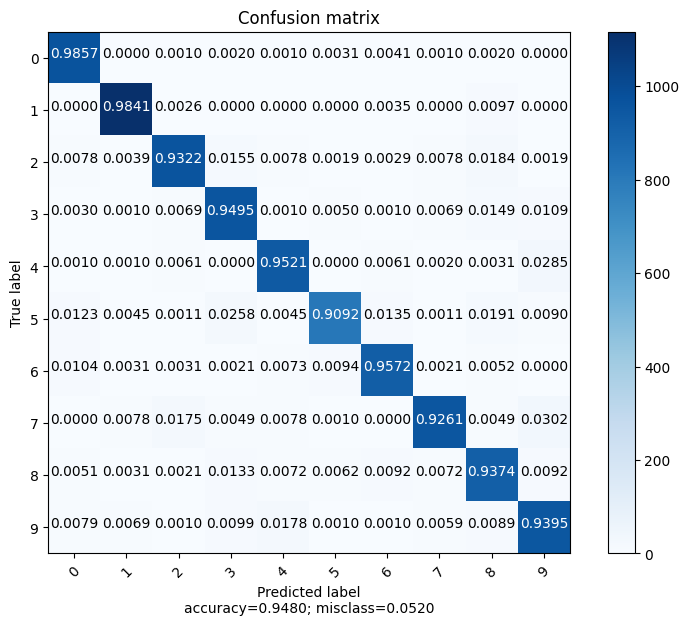

In [12]:
target_names = list(range(0,10))
conf_mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat, target_names)

In [13]:
# Per class accuracy
class_accuracy = 100 * conf_mat.diagonal() / conf_mat.sum(1)

for (i, ca) in enumerate(class_accuracy):
  print(f'Accuracy for {i} : {ca:.3f}%')

Accuracy for 0 : 98.571%
Accuracy for 1 : 98.414%
Accuracy for 2 : 93.217%
Accuracy for 3 : 94.950%
Accuracy for 4 : 95.214%
Accuracy for 5 : 90.919%
Accuracy for 6 : 95.720%
Accuracy for 7 : 92.607%
Accuracy for 8 : 93.737%
Accuracy for 9 : 93.954%


In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.96      0.93      0.94      1032
           3       0.93      0.95      0.94      1010
           4       0.95      0.95      0.95       982
           5       0.97      0.91      0.94       892
           6       0.96      0.96      0.96       958
           7       0.97      0.93      0.95      1028
           8       0.91      0.94      0.93       974
           9       0.91      0.94      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

